In [232]:
# Importing Pandas, NumPy, Seaborn and matplotlib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import required stats libraries and scaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [233]:
#set to show all cols and rows
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [234]:
countries=pd.read_csv("Country-data.csv")
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
#Analyze the dataypes of each column
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [331]:
#Below three columns are converted to number as they were expressed as Percetage in the original dataset
countries['exports'] = countries['exports']*countries['gdpp']/100
countries['imports'] = countries['imports']*countries['gdpp']/100
countries['health'] = countries['health']*countries['gdpp']/100
countries.head()

In [332]:
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [333]:
# Confirming no missing values
round(100*(countries.isnull().sum()/len(countries.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [334]:
#Check for mean and median values
countries.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [335]:
#Copy the dataset into another dataframe
df_country_pca=countries.copy()
df_country_pca.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [336]:
#store country in another variable and remove fom dataset as this is a categorigal variable and not required for PCA
y=df_country_pca.pop('country')
df_country_pca.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


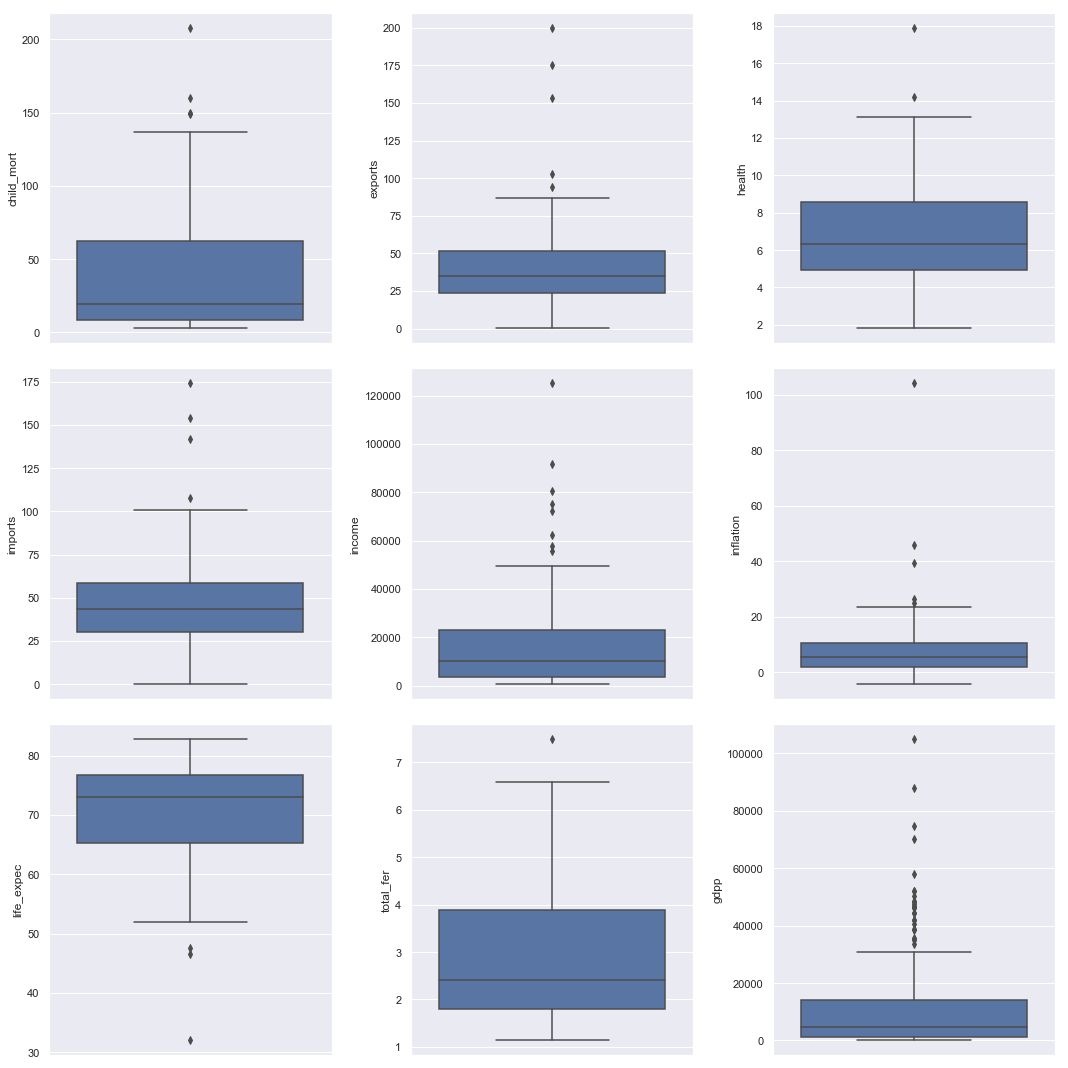

In [337]:
# PLot all the numerical columns and visually check if there are any outliers
numerical=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
fig, ax = plt.subplots(3,3, figsize=(15, 15))
fig.tight_layout()

for variable, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x=variable, data=country_pca, ax=subplot,orient='v')
    plt.xticks(rotation='vertical')
    fig.tight_layout()

#### From the above boxplots it is clear that all the numerical variables do have outliers in the dataset. We will treat the outliers after performing PCA and before clustering the data.

In [338]:
# Scaling the data before applying PCA using stdscaler

scaler= StandardScaler()
df_scaler=scaler.fit_transform(df_country_pca)
df_scaler[:5,:5]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.29153238, -0.4110113 , -0.56503989, -0.4322755 , -0.8082454 ],
       [-0.5389489 , -0.35019096, -0.43921769, -0.31367739, -0.3753689 ],
       [-0.27283273, -0.31852577, -0.48482608, -0.35372048, -0.22084447],
       [ 2.00780766, -0.29137452, -0.53236319, -0.34595254, -0.58504345],
       [-0.69563412, -0.10433146, -0.17877054,  0.04073499,  0.10173177]])

In [339]:
df_scaler.max()

9.839814177922182

### Apply PCA on scaled data

In [340]:
# Apply PCA using svd_solver and random state. set random state to get consistent result for each execution
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state =42)
pca.fit(df_scaler)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [341]:
#Check the components
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [342]:
#Check the variance ratio for each variable
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

<BarContainer object of 9 artists>

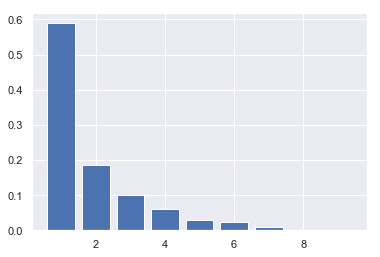

In [343]:
#Plot these variable on bar graph
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

#### Making Scree plot for explained variance ratio

Text(0, 0.5, 'Cumulative Variance')

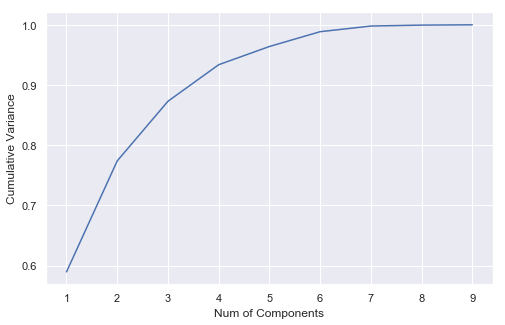

In [344]:
#Using Scree plot to decide how many components to choose for PCA analysis 
fig = plt.figure(figsize = (8,5))
cum=np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(cum)+1), cum)
plt.xlabel('Num of Components')
plt.ylabel('Cumulative Variance')

#### From the above scree plot we can infer 95% of variance can be explained using 5 components
#### Applying PCA with 5 components

In [345]:
#Finally let's go ahead and do dimenstionality reduction
from sklearn.decomposition import IncrementalPCA
pcawith5 = IncrementalPCA(n_components = 5)

In [346]:
#Apply PCA for 5 components and check the shape of the new df with reduced variables
pca5df=pcawith5.fit_transform(df_scaler)
pca5df.shape

(167, 5)

In [347]:
#Arrange the PC's in dataframe format
df = pd.DataFrame(pca5df, columns=["PC1", "PC2","PC3","PC4","PC5"])
df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


In [348]:
#Adding the country back to the PC dataset
df_final=pd.concat([df,y],axis=1)
df_final.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,Afghanistan
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,Albania
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,Algeria
3,-2.723472,2.174966,0.597397,0.417695,0.056694,Angola
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,Antigua and Barbuda


In [349]:
df_final.shape

(167, 6)

### Outlier Analysis and treatment

(149, 6)

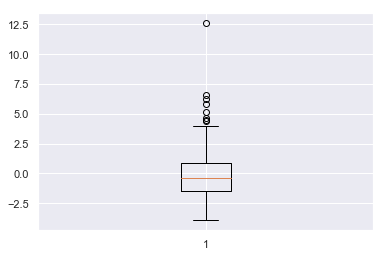

In [350]:
# IQR: Inter Quntile Range Method
# For PC1
plt.boxplot(df_final.PC1)
Q1 = df_final.PC1.quantile(0.05)
Q3 = df_final.PC1.quantile(0.95)
IQR = Q3-Q1
pc1 = df_final[(df_final.PC1>=Q1) & (df_final.PC1<=Q3)]
pc1.shape

(149, 6)

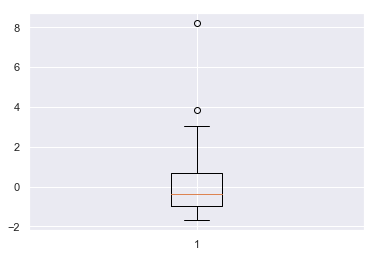

In [351]:
# IQR for PC2
plt.boxplot(df_final.PC2)
Q1 = df_final.PC2.quantile(0.05)
Q3 = df_final.PC2.quantile(0.95)
IQR = Q3-Q1
pc2 = df_final[(df_final.PC2>=Q1) & (df_final.PC2<=Q3)]
pc2.shape

(149, 6)

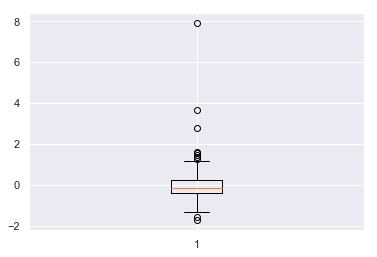

In [352]:
#IQR for PC3
plt.boxplot(df_final.PC3)
Q1 = df_final.PC3.quantile(0.05)
Q3 = df_final.PC3.quantile(0.95)
IQR = Q3-Q1
pc3 = df_final[(df_final.PC3>=Q1) & (df_final.PC3<=Q3)]
pc3.shape

(149, 6)

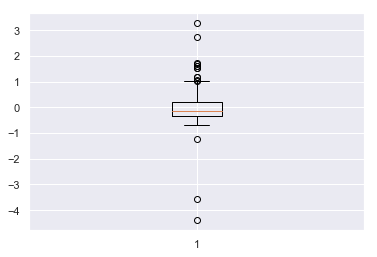

In [353]:
#IQR for PC4
plt.boxplot(df_final.PC4)
Q1 = df_final.PC4.quantile(0.05)
Q3 = df_final.PC4.quantile(0.95)
IQR = Q3-Q1
pc4 = df_final[(df_final.PC4>=Q1) & (df_final.PC4<=Q3)]
pc4.shape

(149, 6)

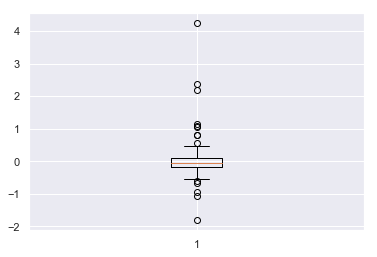

In [354]:
#IQR for PC5
plt.boxplot(df_final.PC5)
Q1 = df_final.PC5.quantile(0.05)
Q3 = df_final.PC5.quantile(0.95)
IQR = Q3-Q1
df_pc5 = df_final[(df_final.PC5>=Q1) & (df_final.PC5<=Q3)]
pc5.shape

In [355]:
#Original dataset with outliers
df_final.shape

(167, 6)

In [356]:
#dataset with outliers removed
df_pc5.shape

(149, 6)

In [357]:
#Creating df of outlier rows as we may need to merge this with original dataset after clustering
df_outlier=df_final[ ~df_final.isin(pc5)].dropna()
df_outlier

,PC1,PC2,PC3,PC4,PC5,country
17,-2.364235,1.173529,-1.250741,0.242827,0.149386,Benin
28,-2.439458,1.290525,-1.226484,0.198709,0.202107,Cameroon
31,-3.238097,2.184216,-1.600752,0.262970,0.351212,Central African Republic
32,-3.186040,2.359711,-1.082761,0.530972,0.266735,Chad
57,-0.362277,-1.168478,0.236606,-0.410072,-0.297300,Georgia
82,2.783379,0.415725,1.018490,0.005065,2.189689,Kuwait
97,-2.944672,2.014527,-1.147623,0.499753,0.229805,Mali
98,2.632762,0.075126,-0.055136,-1.229833,-0.470955,Malta
101,-1.116084,-0.213290,-0.554544,-0.137920,-0.218028,"Micronesia, Fed. Sts."
102,-0.513325,-1.235485,0.415000,-0.578428,-0.407218,Moldova


## Clustering

In [358]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [359]:
#Check Hopkins measure
hopkins(df_pc5.drop('country', axis = 1))

0.8728500089347372

In [360]:
#Perform cluster only on scaled data
df_pc5_final = df_pc5.drop('country', axis = 1)

In [361]:
df_pc5_final.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


### Silhoutte Score

In [362]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
ss_avg = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df_pc5_final)
    ss_avg.append([k, silhouette_score(df_pc5_final, kmeans.labels_)])

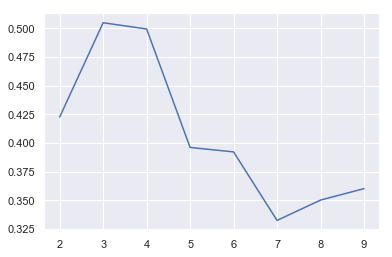

In [363]:
plt.plot(pd.DataFrame(ss_avg)[0], pd.DataFrame(ss_avg)[1]);

In [364]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_pc5_final)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pc5_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4225974908152462
For n_clusters=3, the silhouette score is 0.5047541936192882
For n_clusters=4, the silhouette score is 0.49931310681295593
For n_clusters=5, the silhouette score is 0.41624847795396275
For n_clusters=6, the silhouette score is 0.3623077733016155
For n_clusters=7, the silhouette score is 0.3422564082330938
For n_clusters=8, the silhouette score is 0.357326849090586
For n_clusters=10, the silhouette score is 0.37377921035737954


### From the above plot and analysis it is evident that k should be 3

### Elbow Curve

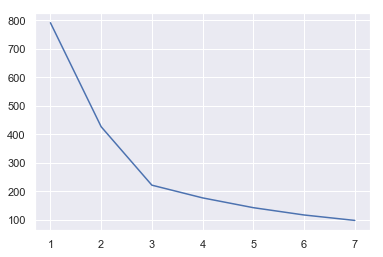

In [365]:
#Now let's proceed to the elbow curve method
el = []
for k in list(range(1,8)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(df_pc5_final)
    el.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(el)[0], pd.DataFrame(el)[1]);

### KMeans with K=4 from above 

In [366]:
#Perform K means using K=3
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 42)
kmean.fit(df_pc5_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [367]:
kmean.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1,
       1, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1,
       0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1,
       2, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0])

In [368]:
#Assign cluster id to dataset
df_pc5_final['cluster_id']=kmean.labels_
df_pc5_final.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1


In [369]:
#Add country back to the dataframe 
df_pc5_final['country']=y

In [370]:
df_pc5_final.head()
df_pc5_final.shape

(149, 7)

In [371]:
df_pc5_final['cluster_id'].value_counts()

1    79
0    45
2    25
Name: cluster_id, dtype: int64

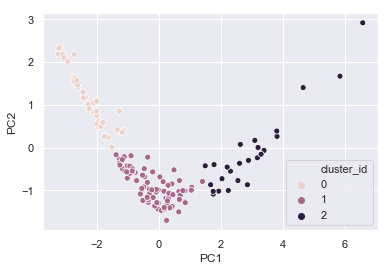

In [372]:
# Plot the PC with respect to the clusters obtained
sns.scatterplot(x = 'PC1', y = 'PC2', hue ='cluster_id', legend = 'full', data = df_pc5_final)

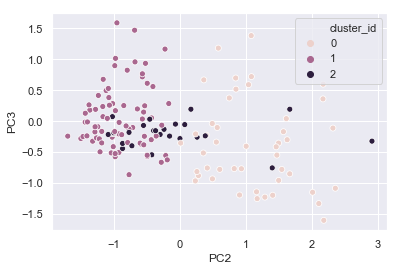

In [373]:
# Plot the PC with respect to the clusters obtained
sns.scatterplot(x = 'PC2', y = 'PC3', hue ='cluster_id', legend = 'full', data = df_pc5_final)

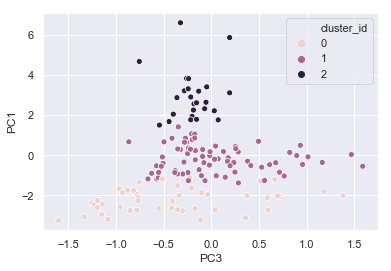

In [374]:
# Plot the PC with respect to the clusters obtained
sns.scatterplot(x = 'PC3', y = 'PC1', hue ='cluster_id', legend = 'full', data = df_pc5_final)

### Cluster Profiling

In [375]:
# Let's merge the original data with the data(ClusterID)
df_final_merged = pd.merge(countries,df_pc5_final, how = 'left', on = 'country')
df_final_merged.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636338,1.472260,-0.548330,0.238302,0.061003,0.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723472,2.174966,0.597397,0.417695,0.056694,0.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1.0


In [376]:
# Let's drop PCs from the data
df_final_merged.drop(['PC1','PC2','PC3','PC4','PC5'], axis=1 , inplace = True)

In [377]:
df_final_merged.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1.0


In [378]:
df_final_merged.shape

(167, 11)

### Analysis of Cluster

In [379]:
# Let's profile the cluster by taking the mean of various attributes
child_mort_mean = pd.DataFrame(df_final_merged.groupby(['cluster_id']).child_mort.mean())
child_mort_mean

,child_mort
cluster_id,
0.0,87.740000
1.0,21.979747
2.0,4.464000


In [380]:
income_mean = pd.DataFrame(df_final_merged.groupby(['cluster_id']).income.mean())
income_mean

,income
cluster_id,
0.0,3260.511111
1.0,11636.455696
2.0,37408.000000


In [381]:
gdpp_mean = pd.DataFrame(df_final_merged.groupby(['cluster_id']).gdpp.mean())
gdpp_mean

,gdpp
cluster_id,
0.0,1590.000000
1.0,6043.316456
2.0,38428.000000


In [296]:
#concat the resultant with the Cluster ID columns 
df_mean = pd.concat([child_mort_mean, gdpp_mean, income_mean], axis=1)
df_mean.head()

,child_mort,gdpp,income
cluster_id,,,
0.0,84.856098,1999.585366,4200.024390
1.0,19.998734,7546.025316,14030.126582
2.0,4.618519,43300.000000,41737.037037
3.0,2.800000,75800.000000,81900.000000


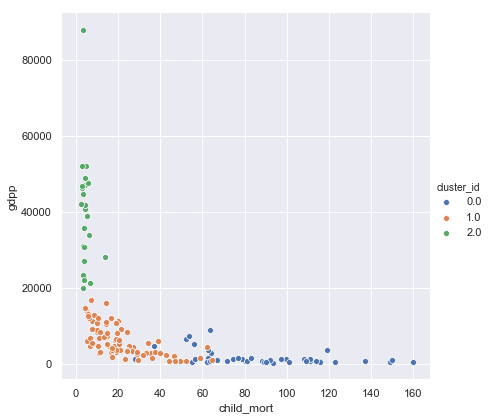

In [382]:
sns.set()
sns.pairplot(df_final_merged, x_vars='child_mort', y_vars='gdpp',height=6, aspect=1,hue='cluster_id', kind='scatter')
plt.show()

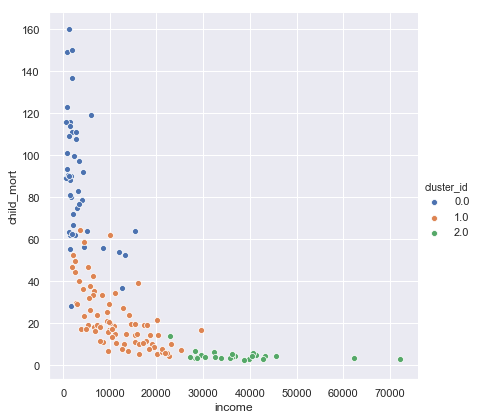

In [383]:
sns.pairplot(df_final_merged, x_vars='income', y_vars='child_mort',height=6, aspect=1,hue='cluster_id', kind='scatter')
plt.show()

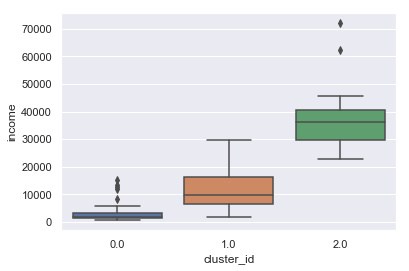

In [384]:
# plot
sns.boxplot(x='cluster_id', y='income', data=df_final_merged)

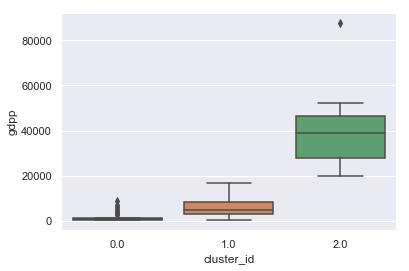

In [385]:
sns.boxplot(x='cluster_id', y='gdpp', data=df_final_merged)

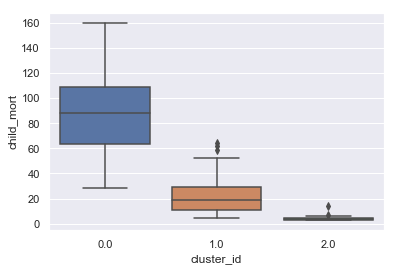

In [386]:
sns.boxplot(x='cluster_id', y='child_mort', data=df_final_merged)

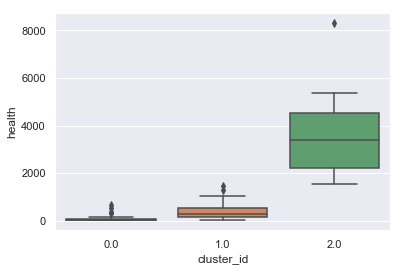

In [410]:
sns.boxplot(x='cluster_id', y='health', data=df_final_merged)

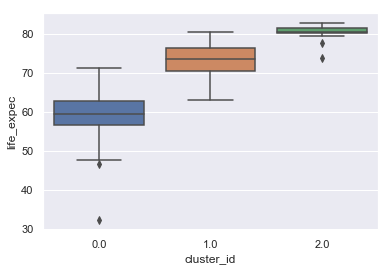

In [412]:
sns.boxplot(x='cluster_id', y='life_expec', data=df_final_merged)

### From the above scatter and boxplots it is clear that clear that cluster id 0 is economically backward with high child mortaity rate and low income and gdpp

In [387]:
#Find the outlier data and store in new df
df_out_treat=df_final_merged[df_final_merged['cluster_id'].isnull()]
df_out_treat

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
11,Bahrain,8.6,14386.500,1028.7900,10536.300,41100,7.440,76.0,2.16,20700,NaN
15,Belgium,4.5,33921.600,4750.8000,33166.800,41100,1.880,80.0,1.86,44400,NaN
23,Brunei,10.5,23792.200,1002.5200,9884.000,80600,16.700,77.1,1.84,35300,NaN
44,Denmark,4.1,29290.000,6612.0000,25288.000,44000,3.220,79.5,1.87,58000,NaN
49,Equatorial Guinea,111.0,14671.800,766.0800,10071.900,33700,24.900,60.9,5.21,17100,NaN
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.450,32.1,3.33,662,NaN
82,Kuwait,10.8,25679.500,1012.5500,11704.000,75200,11.200,78.2,2.21,38500,NaN
91,Luxembourg,2.8,183750.000,8158.5000,149100.000,91700,3.620,81.3,1.63,105000,NaN
103,Mongolia,26.1,1237.550,144.1600,1502.550,7710,39.200,66.2,2.64,2650,NaN
110,Netherlands,4.5,36216.000,5985.7000,31990.800,45500,0.848,80.7,1.79,50300,NaN


### Based on means values found for clusters during cluster analysis it was found cluster 0 is the one with countires who may need aid. For the outlier data I have decied to impute the cluster id=0 for the countries which are economicaly backward. This is to ensure the countries which were removed as part of outlier analysis do not get impacted in the final analysis and are still part of the group which will be reported to the CEO as "Countries which need aid"

In [388]:
#Assign Cluster 0 to the countries which might be in need of aid based on mean values obtained.
df_out_treat.loc[(df_out_treat['child_mort']>=85) & (df_out_treat['income']<=5500) & (df_out_treat['gdpp']<=2500),'cluster_id']=0.0
df_out_treat

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
11,Bahrain,8.6,14386.500,1028.7900,10536.300,41100,7.440,76.0,2.16,20700,NaN
15,Belgium,4.5,33921.600,4750.8000,33166.800,41100,1.880,80.0,1.86,44400,NaN
23,Brunei,10.5,23792.200,1002.5200,9884.000,80600,16.700,77.1,1.84,35300,NaN
44,Denmark,4.1,29290.000,6612.0000,25288.000,44000,3.220,79.5,1.87,58000,NaN
49,Equatorial Guinea,111.0,14671.800,766.0800,10071.900,33700,24.900,60.9,5.21,17100,NaN
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.450,32.1,3.33,662,0.0
82,Kuwait,10.8,25679.500,1012.5500,11704.000,75200,11.200,78.2,2.21,38500,NaN
91,Luxembourg,2.8,183750.000,8158.5000,149100.000,91700,3.620,81.3,1.63,105000,NaN
103,Mongolia,26.1,1237.550,144.1600,1502.550,7710,39.200,66.2,2.64,2650,NaN
110,Netherlands,4.5,36216.000,5985.7000,31990.800,45500,0.848,80.7,1.79,50300,NaN


In [389]:
#Add the cluster id df_out_treat to df_final_merged 
df_final_merged['cluster_id'] = df_final_merged['cluster_id'].fillna(df_out_treat['cluster_id'])
df_final_merged.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1.0


In [391]:
#Check if the assignment happned 
df_final_merged[(df_final_merged['country']=='Haiti')]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,0.0


In [443]:
#Using concept of binning to see which countries need aid and sort the data based on socio economoic factors
df_final_merged_sort=df_final_merged[df_final_merged['cluster_id']==0].sort_values(['income','gdpp','child_mort','health'],ascending=[True,True,False,True])
df_final_merged_sort

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,0.0,0.0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.470,60.8,5.02,327,0.0,0.0
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0.0,0.0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348,0.0,0.0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0.0,0.0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.640,54.5,5.56,419,0.0,0.0
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.100,53.1,5.31,459,0.0,0.0
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.100,58.0,5.34,648,0.0,0.0
150,Togo,90.3,196.1760,37.3320,279.624,1210,1.180,58.7,4.87,488,0.0,0.0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399,0.0,0.0


### Hierarchical Clustering

In [416]:
#drop country and analyze only scaled PC's for clustering
df_pc5.drop('country', axis = 1, inplace=True)
df_pc5.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


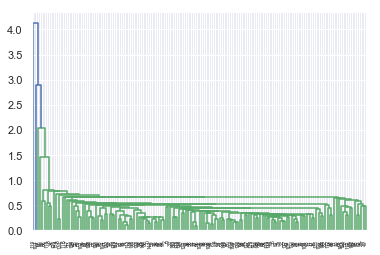

In [394]:
# Single Lineage method
mergings = linkage(df_pc5, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

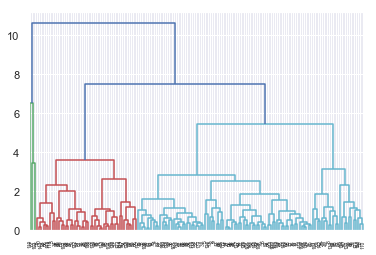

In [395]:
# complete linkage method
mergings = linkage(df_pc5, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [396]:
# From the complete linkage graph we can cut the tree at 6 and get 3 clusters.
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [397]:
#Assign cluster label back to the dataset
df_pc5_final['cluster_labels']=cluster_labels
df_pc5_final.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id,country,cluster_labels
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,0,Afghanistan,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1,Albania,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1,Algeria,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,0,Angola,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1,Antigua and Barbuda,1


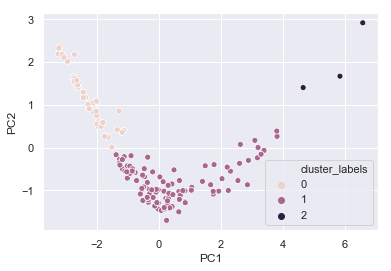

In [437]:
# Plot the PC with respect to the clusters obtained
sns.scatterplot(x = 'PC1', y = 'PC2', hue ='cluster_labels', legend = 'full', data = df_pc5_final)

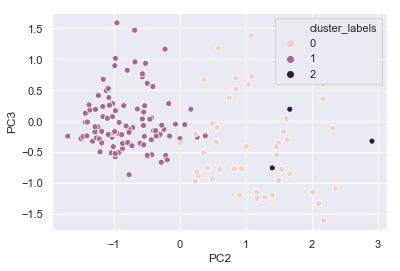

In [438]:
# Plot the PC with respect to the clusters obtained
sns.scatterplot(x = 'PC2', y = 'PC3', hue ='cluster_labels', legend = 'full', data = df_pc5_final)

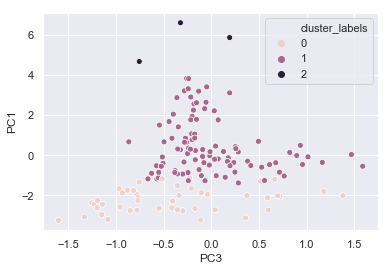

In [439]:
# Plot the PC with respect to the clusters obtained
sns.scatterplot(x = 'PC3', y = 'PC1', hue ='cluster_labels', legend = 'full', data = df_pc5_final)

### Cluster Profiling

In [398]:
# Let's merge the original data with the data(cluster label)
df_final_merged = pd.merge(df_final_merged,df_pc5_final, how = 'left', on = 'country')
df_final_merged.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_x,PC1,PC2,PC3,PC4,PC5,cluster_id_y,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0.0,-2.636338,1.472260,-0.548330,0.238302,0.061003,0.0,0.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1.0,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1.0,1.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1.0,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1.0,1.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0.0,-2.723472,2.174966,0.597397,0.417695,0.056694,0.0,0.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1.0,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1.0,1.0


In [399]:
# Let's drop PCs from the data
df_final_merged.drop(['PC1','PC2','PC3','PC4','PC5','cluster_id_y'], axis=1 , inplace = True)

In [400]:
#rename cluster_id column
df_final_merged.rename(columns={'cluster_id_x': 'cluster_id'}, inplace=True)
df_final_merged.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0.0,0.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1.0,1.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1.0,1.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0.0,0.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1.0,1.0


### Analysis of Cluster

In [401]:
child_mort_mean = pd.DataFrame(df_final_merged.groupby(['cluster_labels']).child_mort.mean())
print(child_mort_mean)

income_mean = pd.DataFrame(df_final_merged.groupby(['cluster_labels']).income.mean())
print(income_mean)

gdpp_mean = pd.DataFrame(df_final_merged.groupby(['cluster_labels']).gdpp.mean())
print(gdpp_mean)

                child_mort
cluster_labels            
0.0               87.74000
1.0               18.19604
2.0                3.40000
                      income
cluster_labels              
0.0              3260.511111
1.0             16578.019802
2.0             60033.333333
                        gdpp
cluster_labels              
0.0              1590.000000
1.0             12425.960396
2.0             61033.333333


In [402]:
#concat the resultant with the Cluster ID columns 
df_mean_hr = pd.concat([child_mort_mean, gdpp_mean, income_mean], axis=1)
df_mean_hr.head()

,child_mort,gdpp,income
cluster_labels,,,
0.0,87.74000,1590.000000,3260.511111
1.0,18.19604,12425.960396,16578.019802
2.0,3.40000,61033.333333,60033.333333


In [419]:
#Find the outlier data and store in new df
df_out_treat=df_final_merged[df_final_merged['cluster_labels'].isnull()]
df_out_treat

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
11,Bahrain,8.6,14386.500,1028.7900,10536.300,41100,7.440,76.0,2.16,20700,NaN,NaN
15,Belgium,4.5,33921.600,4750.8000,33166.800,41100,1.880,80.0,1.86,44400,NaN,NaN
23,Brunei,10.5,23792.200,1002.5200,9884.000,80600,16.700,77.1,1.84,35300,NaN,NaN
44,Denmark,4.1,29290.000,6612.0000,25288.000,44000,3.220,79.5,1.87,58000,NaN,NaN
49,Equatorial Guinea,111.0,14671.800,766.0800,10071.900,33700,24.900,60.9,5.21,17100,NaN,NaN
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.450,32.1,3.33,662,0.0,NaN
82,Kuwait,10.8,25679.500,1012.5500,11704.000,75200,11.200,78.2,2.21,38500,NaN,NaN
91,Luxembourg,2.8,183750.000,8158.5000,149100.000,91700,3.620,81.3,1.63,105000,NaN,NaN
103,Mongolia,26.1,1237.550,144.1600,1502.550,7710,39.200,66.2,2.64,2650,NaN,NaN
110,Netherlands,4.5,36216.000,5985.7000,31990.800,45500,0.848,80.7,1.79,50300,NaN,NaN


In [423]:
#Assign Cluster 0 to the countries which might be in need of aid based on mean values obtained.
df_out_treat.loc[(df_out_treat['child_mort']>=85) & (df_out_treat['income']<=5500) & (df_out_treat['gdpp']<=2500),'cluster_labels']=0.0
df_out_treat

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
11,Bahrain,8.6,14386.500,1028.7900,10536.300,41100,7.440,76.0,2.16,20700,NaN,NaN
15,Belgium,4.5,33921.600,4750.8000,33166.800,41100,1.880,80.0,1.86,44400,NaN,NaN
23,Brunei,10.5,23792.200,1002.5200,9884.000,80600,16.700,77.1,1.84,35300,NaN,NaN
44,Denmark,4.1,29290.000,6612.0000,25288.000,44000,3.220,79.5,1.87,58000,NaN,NaN
49,Equatorial Guinea,111.0,14671.800,766.0800,10071.900,33700,24.900,60.9,5.21,17100,NaN,NaN
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.450,32.1,3.33,662,0.0,0.0
82,Kuwait,10.8,25679.500,1012.5500,11704.000,75200,11.200,78.2,2.21,38500,NaN,NaN
91,Luxembourg,2.8,183750.000,8158.5000,149100.000,91700,3.620,81.3,1.63,105000,NaN,NaN
103,Mongolia,26.1,1237.550,144.1600,1502.550,7710,39.200,66.2,2.64,2650,NaN,NaN
110,Netherlands,4.5,36216.000,5985.7000,31990.800,45500,0.848,80.7,1.79,50300,NaN,NaN


In [424]:
#Add the cluster id df_out_treat to df_final_merged 
df_final_merged['cluster_labels'] = df_final_merged['cluster_labels'].fillna(df_out_treat['cluster_labels'])
df_final_merged.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0.0,0.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1.0,1.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1.0,1.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0.0,0.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1.0,1.0


In [425]:
#Check if the assignment happned 
df_final_merged[(df_final_merged['country']=='Haiti')]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,0.0,0.0


### Plot the varaiables income,gdpp,child_mort, health to check which countries in the cluster needs attention

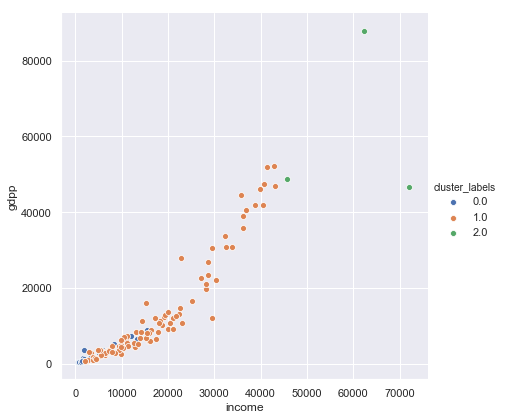

In [426]:
sns.pairplot(df_final_merged, x_vars='income', y_vars='gdpp',height=6, aspect=1,hue='cluster_labels', kind='scatter')
plt.show()

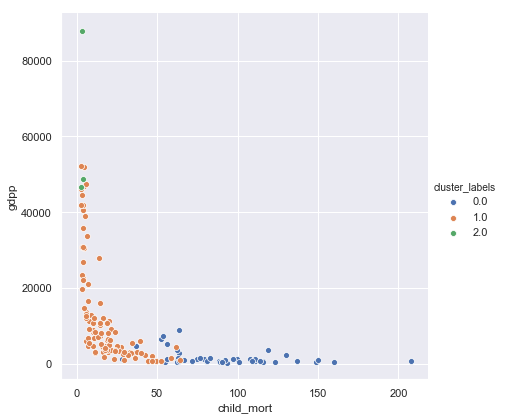

In [427]:
sns.pairplot(df_final_merged, x_vars='child_mort', y_vars='gdpp',height=6, aspect=1,hue='cluster_labels', kind='scatter')
plt.show()

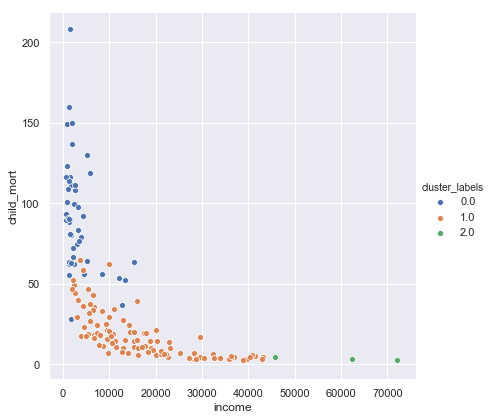

In [428]:
sns.pairplot(df_final_merged, x_vars='income', y_vars='child_mort',height=6, aspect=1,hue='cluster_labels', kind='scatter')
plt.show()

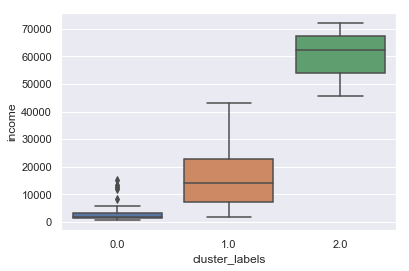

In [429]:
sns.boxplot(x='cluster_labels', y='income', data=df_final_merged)

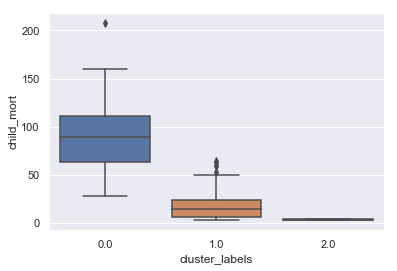

In [430]:
sns.boxplot(x='cluster_labels', y='child_mort', data=df_final_merged)

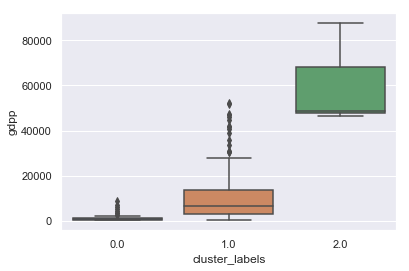

In [431]:
sns.boxplot(x='cluster_labels', y='gdpp', data=df_final_merged)

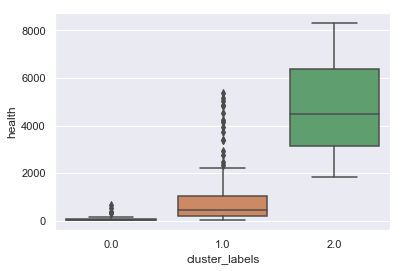

In [432]:
sns.boxplot(x='cluster_labels', y='health', data=df_final_merged)

In [442]:
#Using concept of binning to see which countries need aid and sort the data based on socio economoic factors
df_final_merged[df_final_merged['cluster_labels']==0].sort_values(['income','gdpp','child_mort','health'],ascending=[True,True,False,True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,0.0,0.0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.470,60.8,5.02,327,0.0,0.0
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0.0,0.0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348,0.0,0.0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0.0,0.0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.640,54.5,5.56,419,0.0,0.0
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.100,53.1,5.31,459,0.0,0.0
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.100,58.0,5.34,648,0.0,0.0
150,Togo,90.3,196.1760,37.3320,279.624,1210,1.180,58.7,4.87,488,0.0,0.0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399,0.0,0.0


### Final List of countries in dire need of aid and medical attention are- Congo, Dem. Rep., Liberia,Burundi,Niger, Central African Republic, Mozambique, Guinea, Togo, Sierra Leone, Rwanda
#### There are many countries as part of cluster 0 but we are only reporting the top few countries for which the CEO can take immediate actions. The data is sorted based on income, gdpp and child mortality.
#### Both the clustering techniques have produced similar result and the final list of countries are also very similar.
